In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import pylab as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
import time

# 目標函數

In [2]:
def fitness(x,y):
    z = x**2+2*y**2-0.3*math.cos(3*math.pi*x)*math.cos(4*math.pi*y)+0.3
    #print(z)
    return z

# 起始解

In [3]:
def initialize(size,dimension,x,v,limit,v_high,v_low,p_best,g_best,n):
    for i in range(size):
        for j in range(dimension):
            x[i][j] = random.uniform(limit[0], limit[1])
            v[i][j] = random.uniform(v_low, v_high)
            p_best[i][j] = x[i][j]  # 儲存最佳的解
    # 做出修改
        if fitness(p_best[i][0],p_best[i][1]) < n:
            g_best[0] = p_best[i][0]
            g_best[1] = p_best[i][1]
            n=fitness(g_best[0],g_best[1])

# 更新速度&位置

In [4]:
def update(size,x,v,p_best,g_best,limit,c1,c2,w):
    for i in range(size):
        for j in range(dimension):
            # 更新速度(核心公式)
            v[i][j] = w * v[i][j] + c1 * random.uniform(0, 1) * ( 
                p_best[i][j] - x[i][j]) + c2 * random.uniform(0, 1) * (g_best[j] - x[i][j])
            # 更新位置
            x[i][j] = x[i][j] + v[i][j]
            # 位置限制
            if(x[i][j]>limit[1]):
                x[i][j]=limit[1]
            if(x[i][j]<limit[0]):
                x[i][j]=limit[0]   

# 更新最佳解+更新速度&位置

In [5]:
def PSO(size,x,v,p_best,g_best,limit,c1,c2,w,max_it,it,best):
    while(it<max_it):
        for i in range(size):
            if fitness(x[i][0],x[i][1])<fitness(p_best[i][0],p_best[i][1]):
                p_best[i][0]=x[i][0]
                p_best[i][1]=x[i][1]
            if fitness(p_best[i][0],p_best[i][1])<fitness(g_best[0],g_best[1]):
                g_best[0]=p_best[i][0]
                g_best[1]=p_best[i][1]
        best.append(fitness(g_best[0],g_best[1]))    
        update(size,x,v,p_best,g_best,limit,c1,c2,w)
        it=it+1

# 主程式

最佳解： [ 0.00055024 -0.00024163]
目標函數： 5.836541899006953e-06
花費時間： 3.0470149517059326


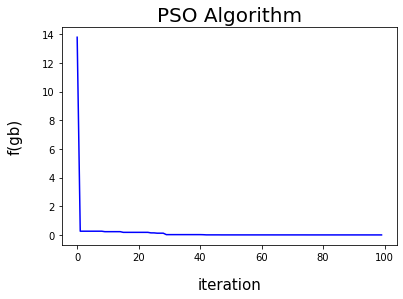

In [23]:
#參數設置
size = 1000 # 粒子群大小
dimension = 2  # 變數個數
v_low = -1
v_high = 1
limit = [-100, 100]
x = np.zeros((size, dimension))  # 所有粒子的位置
v = np.zeros((size, dimension))  # 所有粒子的速度
p_best = np.zeros((size, dimension))  # 每個粒子最佳的位置
g_best = np.zeros((dimension))  # 全局最佳的位置
c1 = 2.0  # 學習因子
c2 = 2.0
w = 0.8   # 自身權重因子
it=0 #迭代次數
max_it =100 #停止迭代條件
n=1000
best=[]
best_n=0
#PSO演算法
tStart = time.time()
initialize(size,dimension,x,v,limit,v_high,v_low,p_best,g_best,n)
PSO(size,x,v,p_best,g_best,limit,c1,c2,w,max_it,it,best)
tEnd = time.time()
print('最佳解：',g_best)            
print('目標函數：',fitness(g_best[0],g_best[1]))
print('花費時間：',tEnd - tStart)

#畫畫
plt.title("PSO Algorithm", fontsize=20)
plt.xlabel("iteration", fontsize=15, labelpad = 15)
plt.ylabel("f(gb)", fontsize=15, labelpad = 20)
plt.plot(best,color = 'b')